# IPL FIRST INNING SCORE PREDICTION

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# IMPORTING DATASET AND LOOKING AT FIRST 5 RECOREDS
df= pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# LOOKING AT THE LAST 5 RECORDS
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [4]:
df.shape

(76014, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
# Looking ate the unique values of Categorical Features
print(df['date'].nunique())
print(df['venue'].nunique())
print(df['bat_team'].nunique())
print(df['bowl_team'].nunique())
print(df['batsman'].nunique())
print(df['bowler'].nunique())


442
35
14
14
411
329


# FEATURE ENGINEERING

In [8]:
# DATA CLEANING--> REMOVAL OF UNWANTED COLUMNS
df.drop(['mid','venue','batsman','bowler','striker','non-striker'],axis=1,inplace=True)


In [9]:
# LOOKING AT UNIQUE VALUES OF 'BAT_TEAM' COLUMNS
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
# KEEPING ONLY CURRENT TEAMS
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']


In [11]:
# FILTERING OUT CONSISTENT TEAMS FROM 'bat_team' & 'bowl_team' COLUMN
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [12]:
# REMOVING THE FIRST 5 OVERS DATA IN EVERY MATCH
# WE NEED DATA OF ATLEAST 5 OVER TO PREDICT THE SCORE
df= df[df['overs']>=5.0]

In [13]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [15]:
# CONVERTING THE COLUMN 'date' from string into datetime object
from datetime import datetime
df['date']= df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

 
# Handeling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

In [16]:
# USING ONE-HOT-ENCODING AS DATA IS NOT IN ANY ORDER
# ALL OTHER CATEGORICAL DATA COLUMNS WERE DROPPED
encoded_df= pd.get_dummies(data=df, columns=['bat_team','bowl_team'])

In [17]:
encoded_df.head()


,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [19]:
# REARRANGING THE COLUMNS FOR BETTER UNDERSTANDING
encoded_df=encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [20]:
# SPLITTING THE DATA INTO TRAIN AND TEST ON THE BASIS OF DATE
X_train= encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year <= 2016]
X_test= encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year >= 2017]


In [21]:
y_train= encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test= encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [22]:
# Removing the 'date' columns
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

# MODEL BUILDING

In [23]:
# SIMPLE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
# our prediction variable
y_pred=regressor.predict(X_test)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # MEAN ABSOLUTE ERROR
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) # MEAN SQUARED ERROR
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # ROOT MEAN SQUARED ERROR

MAE: 12.118617546193294
MSE: 251.00792310417438
RMSE: 15.843229566732106


In [26]:

# r squared error
metrics.r2_score(y_test,y_pred)

0.7522633566350527

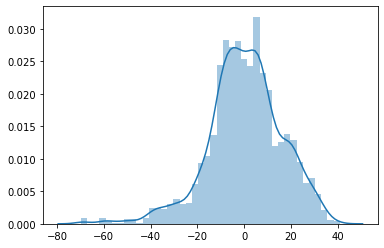

In [27]:
import seaborn as sns
sns.distplot(y_test-y_pred)

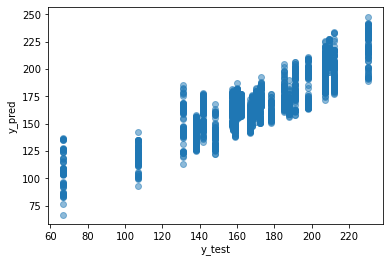

In [28]:
# plotting the scatter plot
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# RIDGE REGRESSION

In [29]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [30]:
# HYPERPARAMETER TUNING USING GRID SEARCH
ridge= Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.20644e-20): result may not be accurate.
  overwrite_a=True).T
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.39691e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33341e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.25488e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditione

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [31]:
# LOOKING AT THE BEST PARAMETERS AND BEST SCORE
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-326.1762896662687


In [32]:
# OUR RIDGE REGRESSOR PREDICTION VARIABLE
predictions= ridge_regressor.predict(X_test)

In [33]:
# LOOKING AT THE ACCURACY GIVEN BY RIDGE REGRESSOR
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # MEAN ABSOLUTE ERROR
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # MEAN SQUARED ERROR
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # ROOT MEAN SQUARED ERROR

MAE: 12.117294527005017
MSE: 251.03172964112733
RMSE: 15.843980864704656


In [34]:
# r squared error
metrics.r2_score(y_test,predictions)

0.7522398603585928

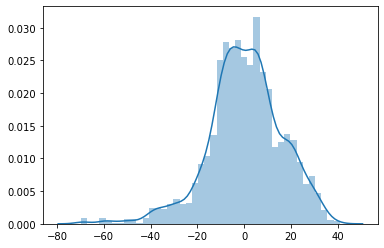

In [35]:
import seaborn as sns
sns.distplot(y_test-predictions)

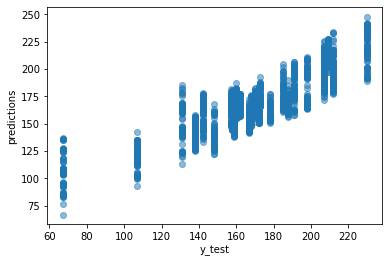

In [36]:
# plotting the scatter plot
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

# LASSO REGRESSION

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
# HYPERPARAMETER TUNING
lasso= Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]} # our parameters
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train) # fitting into model

c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4988509.434419637, tolerance: 2832.4030697086037
  positive)
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5056098.549288098, tolerance: 2976.502519046344
  positive)
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5179461.729088585, tolerance: 2947.0448237759324
  positive)
c:\users\chaitanya kaul\anaconda3\envs\carprediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [39]:
# LOOKING AT THE BEST PARAMETERS AND BEST SCORE
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.9085017331346


In [40]:
# OUR LASSO REGRESSOR PREDICTION VARIABLE
y_predictions= lasso_regressor.predict(X_test)

In [41]:
# LOOKING AT THE ACCURACY GIVEN BY RIDGE REGRESSOR
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions)) # MEAN ABSOLUTE ERROR
print('MSE:', metrics.mean_squared_error(y_test, y_predictions)) # MEAN SQUARED ERROR
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions))) # ROOT MEAN SQUARED ERROR

MAE: 12.214053814850248
MSE: 262.37973664007154
RMSE: 16.198139912967523


In [42]:
# r squared error
metrics.r2_score(y_test,y_predictions)

0.7410397471190056

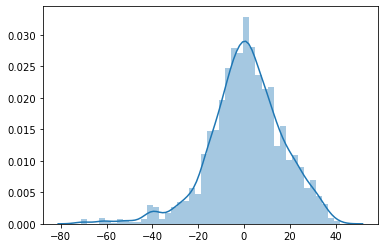

In [43]:
sns.distplot(y_test-y_predictions)

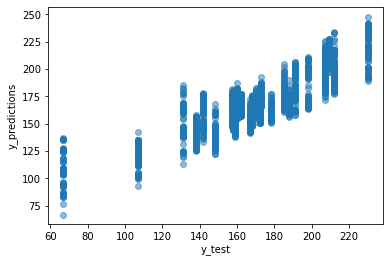

In [44]:
# plotting the scatter plot
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_predictions")
plt.show()

# RANDOM FOREST REGRESSOR

In [45]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
# y_pred--> our prediction variable for random forest regressor
y_predd= reg_rf.predict(X_test)

In [47]:
# LOOKING AT THE ACCURACY GIVEN BY RIDGE REGRESSOR
print('MAE:', metrics.mean_absolute_error(y_test, y_predd)) # MEAN ABSOLUTE ERROR
print('MSE:', metrics.mean_squared_error(y_test, y_predd)) # MEAN SQUARED ERROR
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predd))) # ROOT MEAN SQUARED ERROR

MAE: 13.918927765778738
MSE: 339.5593607236821
RMSE: 18.42713653077119


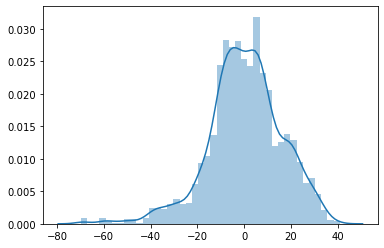

In [48]:
sns.distplot(y_test-y_pred)
plt.show()

In [49]:
# r squared error
metrics.r2_score(y_test,y_predd)

0.6648659723226349

# HYPERPARAMETER TUNING 

USING RANDOMIZED SEARCHCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [53]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  29.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  29.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  30.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  29.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  29.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  28.6s
[CV] n_estimators=900, min_samples_split=5, min_samp

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total= 2.1min
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total= 1.8min
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total= 1.9min
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total= 2.0min
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total= 1.8min
[CV] n_estimators=700, min_samples_split=5,

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=  12.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  12.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  12.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  12.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  12.4s
[CV] n_estimators=700, min_samples_split=10, min_sa

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 89.6min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
# Looking at the best parameters and best score
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}
-353.24092051627235


In [56]:
# Prediction variable
prediction = rf_random.predict(X_test)

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.06016720216891
MSE: 287.33370848267674
RMSE: 16.950920579209754


In [58]:
# R- squared error
metrics.r2_score(y_test,prediction)

0.7164109898014737

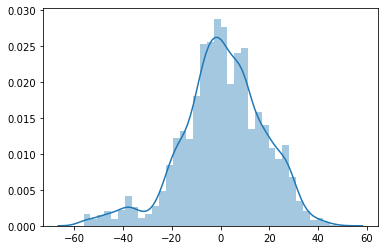

In [59]:
sns.distplot(y_test-prediction)
plt.show()

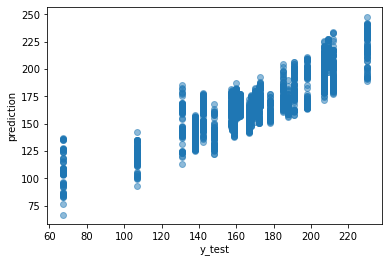

In [60]:
# plotting the scatter plot
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [62]:
# Creating a pickle file for the classifier
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))